In [1]:
import pandas as pd
import numpy as np
import random as ra
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from tqdm import tqdm
from pyswarm import pso
from PIL import Image 


In [2]:
IMG_DIR='dataset'
IMG_SIZE=(100, 100)
SEP_IMG_DIR ="cop_img_dataset1"
cop_img_size=(100, 480)


In [5]:
input_folder = IMG_DIR
output_folder = SEP_IMG_DIR
os.makedirs(output_folder, exist_ok=True)

df = pd.read_csv(os.path.join(input_folder, "labels.csv"))
new_rows = []

for index, row in tqdm(df.iterrows(), total=len(df), desc="Processing images"):
    filename = row["filename"]
    label = row["fill_percentage"]

    img_path = os.path.join(input_folder, filename)
    img = Image.open(img_path)

    # Take a vertical center crop of 
    strip=40
    left = (640 - strip) // 2
    top = 0
    right = left + strip
    bottom = 480
    img_cropped = img.crop((left, top, right, bottom))

    new_name = f"strip_{filename}"
    img_cropped.save(os.path.join(output_folder, new_name))

    new_rows.append({"filename": new_name, "fill_percentage": label})


# Save new CSV for cropped images
pd.DataFrame(new_rows).to_csv(os.path.join(output_folder, "labels.csv"), index=False)


Processing images: 100%|██████████| 6576/6576 [02:57<00:00, 37.09it/s] 


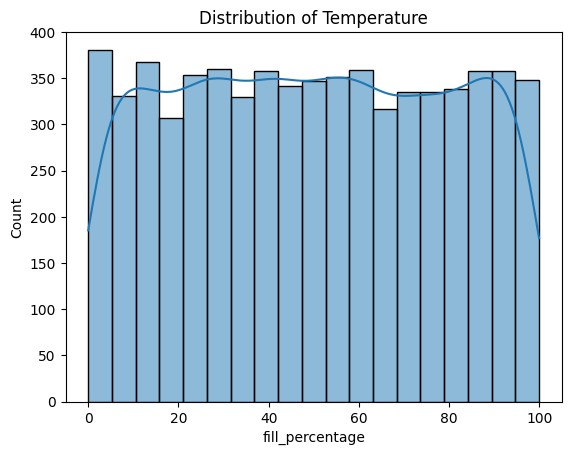

In [4]:
df = pd.read_csv('cop_img_dataset1/labels.csv')
data=df.iloc[:, 1] * 100
# Convert fill_percentage to temperature
sns.histplot(data, kde=True)
plt.title('Distribution of Temperature')
plt.show()